# Plot random init

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import glob
paths_gpomdp = glob.glob("data/random-init-nn/gpomdp/progress*.csv")
paths_remps = glob.glob("data/random-init-nn/remps/progress*.csv")

paths

['data/random-init-nn/gpomdp/progress7.csv',
 'data/random-init-nn/gpomdp/progress18.csv',
 'data/random-init-nn/gpomdp/progress19.csv',
 'data/random-init-nn/gpomdp/progress6.csv',
 'data/random-init-nn/gpomdp/progress4.csv',
 'data/random-init-nn/gpomdp/progress5.csv',
 'data/random-init-nn/gpomdp/progress1.csv',
 'data/random-init-nn/gpomdp/progress2.csv',
 'data/random-init-nn/gpomdp/progress20.csv',
 'data/random-init-nn/gpomdp/progress3.csv',
 'data/random-init-nn/gpomdp/progress11.csv',
 'data/random-init-nn/gpomdp/progress10.csv',
 'data/random-init-nn/gpomdp/progress12.csv',
 'data/random-init-nn/gpomdp/progress13.csv',
 'data/random-init-nn/gpomdp/progress8.csv',
 'data/random-init-nn/gpomdp/progress17.csv',
 'data/random-init-nn/gpomdp/progress16.csv',
 'data/random-init-nn/gpomdp/progress9.csv',
 'data/random-init-nn/gpomdp/progress14.csv',
 'data/random-init-nn/gpomdp/progress15.csv']

In [24]:
dfs = [pd.read_csv(p) for p in paths_gpomdp]
om = np.array([df.Omega[0] for df in dfs])
ret = np.array([np.max(df.ReturnsMean) for df in dfs])
om

array([ 7.9,  6.9, 15.1, 19.1,  4.9,  3.9, 20.1, 27.9, 20.1, 24.9, 24.9,
       21.1,  8.9,  8.9,  9.9, 19.1,  5.9,  8.9, 23.9, 19.1])

In [25]:
dfs_remps = [pd.read_csv(p) for p in paths_remps]
om_remps = np.array([df.Omega[0] for df in dfs_remps])
ret_remps = np.array([np.max(df.ReturnsMean) for df in dfs_remps])
om_remps

array([ 9.9600255 , 12.95473216, 24.00721061, 27.04708338, 27.04646385,
       10.95840989, 28.06388445, 28.06365795,  3.98191441, 29.08104427,
       18.9695591 ,  7.96644513,  0.99559159, 17.96546802, 14.9558781 ,
        6.96997149, 21.99027697, 16.96199272, 16.96166886, 14.95560161])

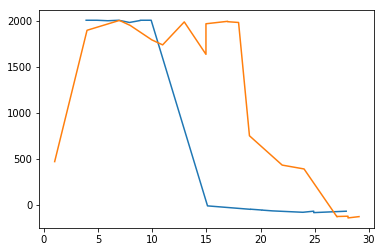

In [30]:
ind = np.argsort(om)
ind_remps = np.argsort(om_remps)


plt.plot(om[ind], ret[ind], om_remps[ind_remps], ret_remps[ind_remps])
plt.savefig("random-init.png")

In [29]:
file_name="random-init.csv"
to_write = np.concatenate((np.reshape(om, (-1,1)), np.reshape(om_remps, (-1,1)), np.reshape(ret,(-1,1)), np.reshape(ret_remps,(-1,1))), axis=1)
np.savetxt(file_name, to_write, delimiter=',', header="Omega_gpomdp, Omega_remps, Return_gpomdp, Return_remps", comments='')

